In [3]:
from functools import reduce

import matplotlib.pyplot as plt
import numpy as np
from numpy import dot
from numpy.linalg import inv
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# Helper functions
def mdot(*args):
    """Multi argument dot function. http://wiki.scipy.org/Cookbook/MultiDot"""
    return reduce(np.dot, args)


def prepend_one(X):
    """prepend a one vector to X."""
    return np.column_stack([np.ones(X.shape[0]), X])


def quad_feature(X):
    """calculate the quadratic feature of X."""
    return np.column_stack((np.ones(X.shape[0]), X[:, 0], X[:, 1], X[:, 0]*X[:, 0], X[:, 0]*X[:, 1], X[:, 1]*X[:, 1]))


def grid2d(start, end, num=50):
  """Create an 2D array where each row is a 2D coordinate.
  np.meshgrid is pretty annoying!
  """
  dom = np.linspace(start, end, num)
  X0, X1 = np.meshgrid(dom, dom)
  return np.column_stack([X0.flatten(), X1.flatten()])

In [5]:
# load the data
data = np.loadtxt("C:/Users/Danie_000/OneDrive/Machine Learning/pythonproject/dataQuadReg2D.txt")
print("data.shape:", data.shape)
np.savetxt("tmp.txt", data) # save data if you want to
# split into features and labels
X, y = data[:, :2], data[:, 2]
print("X.shape:", X.shape)
print("y.shape:", y.shape)

data.shape: (100, 3)
X.shape: (100, 2)
y.shape: (100,)


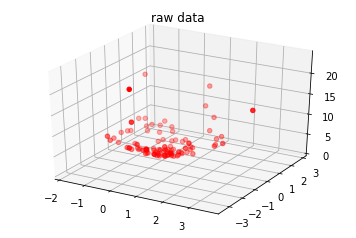

In [6]:
# 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")  # the projection arg is important!
ax.scatter(X[:, 0], X[:, 1], y, color="red")
ax.set_title("raw data")
plt.draw()  # show, use plt.show() for blocking

In [7]:
# prep for linear reg.
X = quad_feature(X)
print("X.shape:", X.shape)
# Fit model/compute optimal parameters beta with regularization
I = np.identity(6)
lambda_ = 0
beta_ = mdot(inv(dot(X.T, X) + I*lambda_), X.T, y)
print("Optimal beta:", beta_)
# prep for prediction
X_grid = quad_feature(grid2d(-3, 3, num=30))
print("X_grid.shape:", X_grid.shape)
# Predict with trained model
y_grid = mdot(X_grid, beta_)
print("Y_grid.shape", y_grid.shape)
# calculate square error
square_error = dot((y-dot(X, beta_)).T, y-dot(X, beta_))
print("square error:", square_error)

X.shape: (100, 6)
Optimal beta: [ 1.26428783 -0.15318758 -0.27072946  1.08730116 -0.75215957  1.72877749]
X_grid.shape: (900, 6)
Y_grid.shape (900,)
square error: 1.1882808590536502


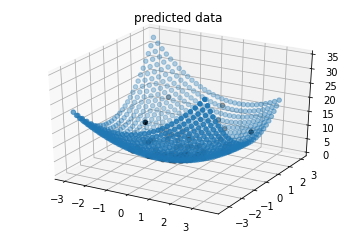

In [8]:
# vis the result
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # the projection part is important
ax.scatter(X_grid[:, 1], X_grid[:, 2], y_grid)  # don't use the 1 infront
ax.scatter(X[:, 1], X[:, 2], y, color="black")  # also show the real data
ax.set_title("predicted data")
plt.show()